## In class Exercise 5
The purpose of this exercise is to practice different ML algorithms for text classification, text clustering, and model evaluation.

Hint: You might want to use the code demos from previous lectures, where suitable.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due tonight December 6th, 2023 at 11:59 PM.
**Late submissions cannot be considered.**

### Question 1.

The purpose of this question is to practice different machine learning algorithms for text classification, along with performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training.

The dataset (see Canvas) contains two files train data and test data for sentiment analysis in IMDB review, and it has two categories: 1 represents positive and 0 represents negative.

You need to split the training data into training and validation data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model needs to be evaluated on the test data.

Algorithms:
1. MultinominalNB (2 points)
2. SVM (2 points)
3. KNN (2 points)
4. Decision tree (2 points)
5. Random Forest (2 points)
6. XGBoost (2 points)

Evaluation measurement:
1. Accuracy (2 points)
2. Recall (2 points)
3. Precison (2 points)
4. F-1 score (2 points)

In [110]:
# Write your code here
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from xgboost import XGBClassifier



In [111]:
train_dfrme = pd.read_csv(r'/content/stsa-train.txt',sep = 'delimiter=',header= None,names=['Text'])
train_dfrme[['Sentiment','Text']] = train_dfrme["Text"].str.split(" ", 1, expand=True)

train_dfrme.head()

<ipython-input-111-e5129352b765>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_dfrme = pd.read_csv(r'/content/stsa-train.txt',sep = 'delimiter=',header= None,names=['Text'])
<ipython-input-111-e5129352b765>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  train_dfrme[['Sentiment','Text']] = train_dfrme["Text"].str.split(" ", 1, expand=True)


,Text,Sentiment
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [112]:
test_dfrme = pd.read_csv(r'stsa-test.txt',sep = 'delimiter=',header= None,names=['Text'])
test_dfrme[['Sentiment','Text']] = test_dfrme["Text"].str.split(" ", 1, expand=True)

<ipython-input-112-b3591e10982c>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_dfrme = pd.read_csv(r'stsa-test.txt',sep = 'delimiter=',header= None,names=['Text'])
<ipython-input-112-b3591e10982c>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  test_dfrme[['Sentiment','Text']] = test_dfrme["Text"].str.split(" ", 1, expand=True)


In [113]:
test_dfrme.head()

,Text,Sentiment
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1


In [114]:
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
w_l= WordNetLemmatizer()
def clean_text(txt):
  txt="".join([w.lower() for w in txt if w not in string.punctuation])
  txt = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", txt)
  tok = re.split('\W+',txt)
  txt = [w_l.lemmatize(w1) for w1 in tok if w1 not in stopword]
  return txt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('omw-1.4')
tf_vect = TfidfVectorizer(analyzer = clean_text)
X_idf = tf_vect.fit_transform(train_dfrme['Text'])
print(X_idf.shape)
X_idf_dafrme=pd.DataFrame(X_idf.toarray())
X_idf_dafrme.columns=tf_vect.get_feature_names_out()
X_test_idf = tf_vect.transform(test_dfrme['Text'])
print(X_idf.shape)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


(6920, 13343)
(6920, 13343)


In [116]:
MNB = MultinomialNB()
SVM = LinearSVC()
KNN = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
XGB = XGBClassifier()
x_train, x_test, y_train, y_test = train_test_split(X_idf_dafrme, train_dfrme['Sentiment'].values,
                                                test_size=0.2, random_state=42)

In [117]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
MNB_test = MNB.fit(x_train,y_train)
Y_MNB = MNB_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_MNB,y_test))
print(classification_report(y_test,Y_MNB))
from sklearn.model_selection import cross_val_score
sco_MNB = cross_val_score(MNB, x_test, y_test, cv=10)
print("Accuracy for MultinominalNB",sco_MNB.mean())

Accuracy 0.7955202312138728
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384

Accuracy for MultinominalNB 0.7247054530288813


In [118]:
SVM_test = SVM.fit(x_train,y_train)
Y_SVM = SVM_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_SVM,y_test))
print(classification_report(y_test,Y_SVM))
from sklearn.model_selection import cross_val_score
sco_SVM = cross_val_score(SVM, x_test, y_test, cv=10)
print("Accuracy for SVM",sco_SVM.mean())

Accuracy 0.791907514450867
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       671
           1       0.78      0.83      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384

Accuracy for SVM 0.7348034615785632


In [119]:
KNN_test = KNN.fit(x_train,y_train)
Y_KNN = KNN_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_KNN,y_test))
print(classification_report(y_test,Y_KNN))
from sklearn.model_selection import cross_val_score
scores_KNN = cross_val_score(KNN, x_test, y_test, cv=10)
print("Accuracy for KNN",scores_KNN.mean())

Accuracy 0.740606936416185
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       671
           1       0.74      0.77      0.75       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384

Accuracy for KNN 0.6675737670732979


In [120]:
dec_tree_test = DT.fit(x_train,y_train)
Y_dec_tree = dec_tree_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_dec_tree,y_test))
print(classification_report(y_test,Y_dec_tree))
scores_DT = cross_val_score(DT, x_test, y_test, cv=10)
print("Accuracy for Decision trees",scores_DT.mean())

Accuracy 0.6567919075144508
              precision    recall  f1-score   support

           0       0.66      0.59      0.63       671
           1       0.65      0.72      0.68       713

    accuracy                           0.66      1384
   macro avg       0.66      0.65      0.65      1384
weighted avg       0.66      0.66      0.66      1384

Accuracy for Decision trees 0.6126941924721093


In [121]:
RF_test = RF.fit(x_train,y_train)
Y_RF = RF_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_RF,y_test))
print(classification_report(y_test,Y_RF))
sco_RF = cross_val_score(RF, x_test, y_test, cv=10)
print("Accuracy for Random Forest",sco_RF.mean())

Accuracy 0.7398843930635838
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       671
           1       0.72      0.81      0.76       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384

Accuracy for Random Forest 0.6805651131268897


In [122]:
# Assuming y_train and y_test are pandas Series
y_train = y_train.astype(int)
y_test = y_test.astype(int)
# Now, train your XGBoost model
XGB_test = XGB.fit(x_train,y_train)
Y_XGB = XGB_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_XGB,y_test))
print(classification_report(y_test,Y_XGB))
sco_XGB = cross_val_score(XGB, x_test, y_test, cv=10)
print("Accuracy for XGBoost",sco_XGB.mean())

Accuracy 0.7189306358381503
              precision    recall  f1-score   support

           0       0.77      0.60      0.67       671
           1       0.69      0.83      0.75       713

    accuracy                           0.72      1384
   macro avg       0.73      0.72      0.71      1384
weighted avg       0.73      0.72      0.71      1384

Accuracy for XGBoost 0.6445000521322073


In [123]:
print("MultinominalNB Accuracy",sco_MNB.mean())
print("SVM Accuracy",sco_SVM.mean())
print("KNN Accuracy",scores_KNN.mean())
print("Decision trees",scores_DT.mean())
print("Random Forest Accuracy",sco_RF.mean())
print("XGBoost Accuracy",sco_XGB.mean())

MultinominalNB Accuracy 0.7247054530288813
SVM Accuracy 0.7348034615785632
KNN Accuracy 0.6675737670732979
Decision trees 0.6126941924721093
Random Forest Accuracy 0.6805651131268897
XGBoost Accuracy 0.6445000521322073


In [125]:
predict_MNB = MNB_test.predict(X_test_idf)
print('The final trained model (MNB) with a high accuracy evaluated value based on the test data is: %s' % accuracy_score(predict_MNB,test_dfrme['Sentiment']))

The final trained model (MNB) with a high accuracy evaluated value based on the test data is: 0.7946183415705657


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


### Question 2.

The purpose of the question is to practice different machine learning algorithms for text clustering.

Please downlad the dataset by using the following link: https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones

Apply the listed clustering methods to the dataset:
1. K-means (4 points)
2. DBSCAN (4 points)
3. Hierarchical clustering (4 points)
4. Word2Vec (4 points)
5. BERT (4 points)

In [92]:
#Write your code here.

import pandas as pd
sample_data = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')


In [93]:
sample_data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


<Axes: ylabel='count'>

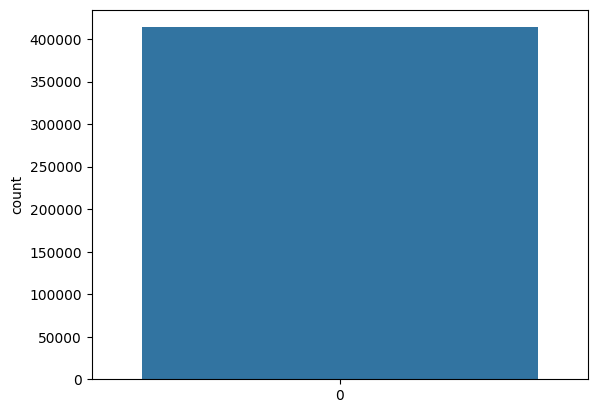

In [96]:
import seaborn as sns
sns.countplot(sample_data.Rating)

In [65]:
def part(x1):
    if x1 < 3:
        return 'negative'
    return 'positive'
act_Sco = sample_data['Rating']
posNeg = act_Sco.map(part)
sample_data['RatingPosNeg'] = posNeg

<Axes: ylabel='count'>

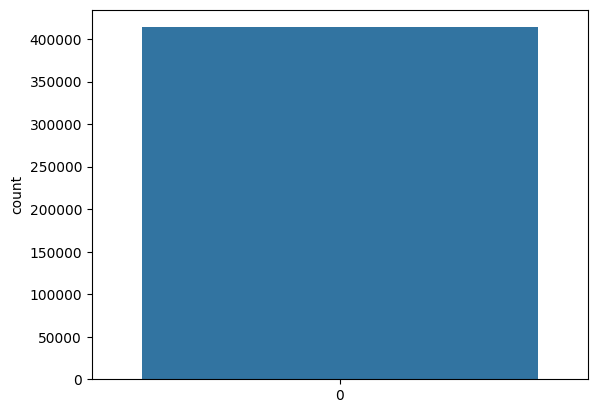

In [66]:
sns.countplot(sample_data.Rating)

In [28]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english')
st=set(stopwords.words('english'))

fi = sample_data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
def clpunc(se):
    clean_dt = re.sub(r'[?|!|\'|"|#]',r'',se)
    clean_dt = re.sub(r'[.|,|)|(|\|/]',r' ',clean_dt)
    return  clean_dt

In [71]:
final = sample_data.sample(n=10000, random_state=1)

In [72]:
import re

i=0
st1=' '
fi_str=[]
all_pos_wrds=[]
all_neg_wrds=[]
s1=''
for se in final['Reviews'].values:
    fil_se=[]
    try:
      for w in se.split():
          for c in clpunc(w).split():
              if((c.isalpha()) & (len(c)>2)):
                  if(c.lower() not in st):
                      s=(sno.stem(c.lower())).encode('utf8')
                      fil_se.append(s)
                      if (final['RatingPosNeg'].values)[i] == 'positive':
                          all_pos_wrds.append(s)
                      if(final['RatingPosNeg'].values)[i] == 'negative':
                          all_neg_wrds.append(s)
                  else:
                      continue
              else:
                  continue
      str1 = b" ".join(fil_se)

      fi_str.append(str1)
      i+=1
    except AttributeError as e:
      fi_str.append('')
      i+=1
final['CleanedText']=fi_str
final['CleanedText']=final['CleanedText'].str.decode("utf-8")
final = final.fillna('')
from sklearn.feature_extraction.text import CountVectorizer
ct_vect = CountVectorizer()
bo = ct_vect.fit_transform(final['CleanedText'].values)
print(bo.shape)

(10000, 8444)


In [73]:
term = ct_vect.get_feature_names_out()

In [74]:
from sklearn.cluster import KMeans
mod = KMeans(n_clusters=10,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=99, copy_x=True, algorithm='auto')
mod.fit(bo)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', n_clusters=10, n_init=10, random_state=99)

In [76]:
lab = mod.labels_
cluster_center=mod.cluster_centers_
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bo, lab, metric='euclidean')
silhouette_score

0.27313704420543833

In [77]:
dfrme = final
dfrme['Bow Clus Label'] = mod.labels_
dfrme.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,5
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,0


In [78]:
dfrme.groupby(['Bow Clus Label'])['Reviews'].count()

Bow Clus Label
0    7396
1       1
2       3
3      83
4     124
5    1922
6      16
7       1
8       2
9     452
Name: Reviews, dtype: int64

In [38]:
print("Top terms per cluster:")
ord_centroids = mod.cluster_centers_.argsort()[:, ::-1]
for i1 in range(10):
    print("Cluster %d:" % i1, end='')
    for i in ord_centroids[i1, :10]:
        print(' %s' % term[i], end='')
        print()

Top terms per cluster:
Cluster 0: phone
 work
 good
 great
 love
 use
 product
 excel
 like
 one
Cluster 1: appl
 iphon
 android
 phone
 samsung
 year
 even
 version
 compani
 know
Cluster 2: phone
 sim
 card
 use
 verizon
 updat
 work
 like
 new
 store
Cluster 3: phone
 use
 get
 like
 one
 screen
 work
 app
 batteri
 good
Cluster 4: phone
 use
 screen
 get
 batteri
 like
 app
 camera
 good
 devic
Cluster 5: phone
 work
 use
 great
 one
 good
 like
 get
 screen
 would
Cluster 6: phone
 use
 screen
 like
 app
 work
 get
 one
 good
 android
Cluster 7: phone
 one
 use
 issu
 band
 like
 far
 app
 good
 usa
Cluster 8: use
 app
 favorit
 screen
 phone
 display
 one
 great
 recent
 back
Cluster 9: phone
 use
 work
 one
 get
 like
 would
 screen
 good
 great


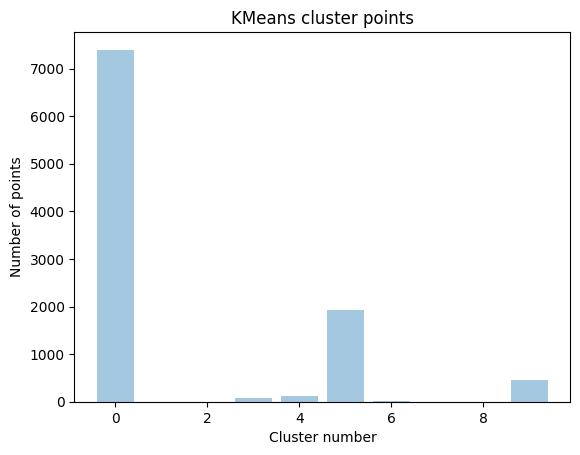

In [79]:
import matplotlib.pyplot as plt
plt.bar([x1 for x1 in range(10)], dfrme.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
idf_vect = TfidfVectorizer()
idf = idf_vect.fit_transform(final['CleanedText'].values)
idf.shape

(10000, 8444)

In [80]:
from sklearn.cluster import KMeans
mod = KMeans(n_clusters = 10,random_state=99)
mod.fit(idf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=99)

In [81]:
lab_tf = mod.labels_
cluster_center_tf=mod.cluster_centers_
cluster_center_tf

array([[4.01978460e-04, 1.34721737e-05, 6.47380325e-05, ...,
        1.44784473e-04, 1.44784473e-04, 1.51394531e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [82]:
ter = idf_vect.get_feature_names_out()
ter[1:10]

array(['aac', 'aand', 'ab', 'abandon', 'abc', 'abd', 'abeautifulit',
       'abierto', 'abil'], dtype=object)

In [83]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(idf, lab_tf, metric='euclidean')
silhouette_score_tf

0.0631973109808856

In [84]:
dfrme1 = dfrme
dfrme1['Tfidf Clus Label'] = mod.labels_
dfrme1.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,5,3
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,0,5
40075,Apple iPhone 5s 16GB (Silver) - T-Mobile,Apple,75.65,1,"the back camera stopped working, the phone tou...",1.0,negative,back camera stop work phone touch screen stop ...,5,3
100790,Blackberry Torch 9800 Unlocked Phone with 5 MP...,BlackBerry,82.62,5,Good!,0.0,positive,good,0,2
58055,Apple iPhone 6 Plus 64GB Unlocked Smartphone -...,,529.99,5,no complaints. worked fine and still working p...,0.0,positive,complaint work fine still work perfect tear we...,0,0


In [85]:
dfrme1.groupby(['Tfidf Clus Label'])['Reviews'].count()

Tfidf Clus Label
0    3967
1     370
2     389
3    3547
4     403
5     252
6     373
7     322
8     172
9     205
Name: Reviews, dtype: int64

In [86]:
print("Top terms per cluster:")
order_centroids = mod.cluster_centers_.argsort()[:, ::-1]
for i1 in range(10):
    print("Cluster %d:" % i1, end='')
    for i in order_centroids[i1, :10]:
        print(' %s' % ter[i], end='')
        print()

Top terms per cluster:
Cluster 0: work
 good
 product
 thank
 nice
 phone
 use
 great
 like
 well
Cluster 1: excel
 product
 phone
 recommend
 thank
 love
 good
 seller
 purchas
 servic
Cluster 2: good
 phone
 product
 condit
 work
 far
 thank
 price
 cell
 problem
Cluster 3: phone
 use
 like
 work
 great
 one
 good
 batteri
 get
 new
Cluster 4: great
 phone
 work
 product
 buy
 condit
 price
 deal
 thank
 far
Cluster 5: perfect
 work
 condit
 phone
 product
 everyth
 love
 great
 thank
 came
Cluster 6: price
 awesom
 phone
 great
 good
 product
 work
 qualiti
 best
 fast
Cluster 7: love
 phone
 great
 new
 daughter
 good
 son
 thank
 iphon
 absolut
Cluster 8: excelent
 producto
 telefono
 celular
 recomendado
 telfono
 súper
 punto
 recomienda
 tlf
Cluster 9: expect
 met
 work
 phone
 better
 exceed
 product
 everyth
 great
 arriv


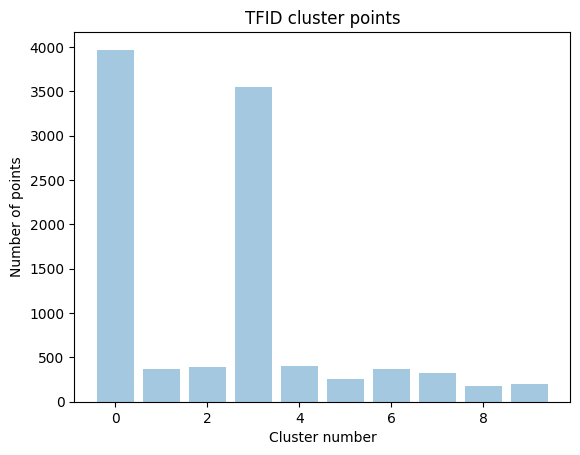

In [87]:
plt.bar([x1 for x1 in range(10)], dfrme1.groupby(['Tfidf Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('TFID cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [88]:
i1=0
lst_of_sent=[]
for se in final['CleanedText'].values:
    lst_of_sent.append(se.split())

In [89]:
i1=0
lst_sent_tr=[]
for s in final['CleanedText'].values:
    filter_sen=[]
    for w in se.split():
        for cle in clpunc(w).split():
            if(cle.isalpha()):
                filter_sen.append(cle.lower())
            else:
                continue
    lst_sent_tr.append(filter_sen)
print(lst_sent_tr)

[['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'pa

In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

In [ ]:
#You can write you answer here. (No code needed)


Every clustering technique has unique advantages and traits. Traditional clustering algorithms include K-means, DBSCAN, and Hierarchical clustering. K-means uses centroids, DBSCAN uses density to identify clusters, and Hierarchical clustering creates a hierarchy of clusters. These techniques are useful in various contexts: Hierarchical clustering provides insights into hierarchical relationships, DBSCAN is effective in identifying clusters of any shape but is sensitive to its parameters, K-means is computationally efficient but requires the specification of the number of clusters. However, two embedding techniques that capture semantic relationships in text are Word2Vec and BERT. Word2Vec uses context to create word embeddings, whereas BERT produces dense representations that capture meaning and context. Word2Vec could be better at capturing word-level similarities, but BERT's contextual understanding could provide more sophisticated representations for tasks involving clustering, particularly when context is important. However, the quality of the extracted features or embeddings, the nature of the clustering problem, and the characteristics of the dataset all play a significant role in how effective these methods are.